In [82]:
import tensorflow as tf
import  numpy as np
import cv2
print(tf.__version__)

1.14.0


In [83]:
import os

In [84]:
!ls
!pwd

VisDrone2019-DET-test-challenge  VisDrone2019-DET-train  VisDrone2019-DET-val
/home/user1/aiskyeye_dataset


In [85]:
!cd aiskyeye_dataset/

/bin/sh: 1: cd: can't cd to aiskyeye_dataset/


In [86]:
%cd aiskyeye_dataset/


[Errno 2] No such file or directory: 'aiskyeye_dataset/'
/home/user1/aiskyeye_dataset


In [87]:
!cd 

In [88]:
base_dir = '/home/user1/aiskyeye_dataset/'
train_base_dir = os.path.join(base_dir, 'VisDrone2019-DET-train')
train_images = os.path.join(train_base_dir, 'images')
train_annotations = os.path.join(train_base_dir, 'annotations')
val_base_dir = os.path.join(base_dir, 'VisDrone2019-DET-val')
val_images = os.path.join(val_base_dir, 'images')
val_annotations = os.path.join(val_base_dir, 'annotations')
test_dir = os.path.join(base_dir, 'VisDrone2019-DET-test-challenge')
test_images = os.path.join(test_dir, 'images')

In [120]:
train_annotations_list = sorted(os.listdir(train_annotations))
val_annotations_list = sorted(os.listdir(val_annotations))
train_images_list = sorted(os.listdir(train_images))
val_images_list = sorted(os.listdir(val_images))
test_images_list = sorted(os.listdir(test_images))

print(train_annotations_list[0:5])
print(train_images_list[0:5])

['0000002_00005_d_0000014.txt', '0000002_00448_d_0000015.txt', '0000003_00231_d_0000016.txt', '0000007_04999_d_0000036.txt', '0000007_05499_d_0000037.txt']
['0000002_00005_d_0000014.jpg', '0000002_00448_d_0000015.jpg', '0000003_00231_d_0000016.jpg', '0000007_04999_d_0000036.jpg', '0000007_05499_d_0000037.jpg']


In [121]:
num_train_images = len(train_images_list)
num_val_images = len(val_images_list)
num_test_images = len(test_images_list)

In [122]:
print(f"No. of train images: {num_train_images}")
print(f"No. of test images: {num_test_images}")
print(f"No. of val images: {num_val_images}")

No. of train images: 6471
No. of test images: 1580
No. of val images: 548


In [123]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows = 4
ncols = 4

pic_index = 0

In [124]:
def draw_boxes(img, box):
    
    box = [int(x) for x in box.split(',')]
    #print(box)
    top_left_x = int(box[0])
    top_left_y = int(box[1])
    width = int(box[2])
    height = int(box[3])

    
    bottom_right_x = top_left_x + width
    bottom_right_y = top_left_y + height
    
    cv2.rectangle(img, (top_left_x, top_left_y), (bottom_right_x, bottom_right_y), (0, 255, 0), 3)

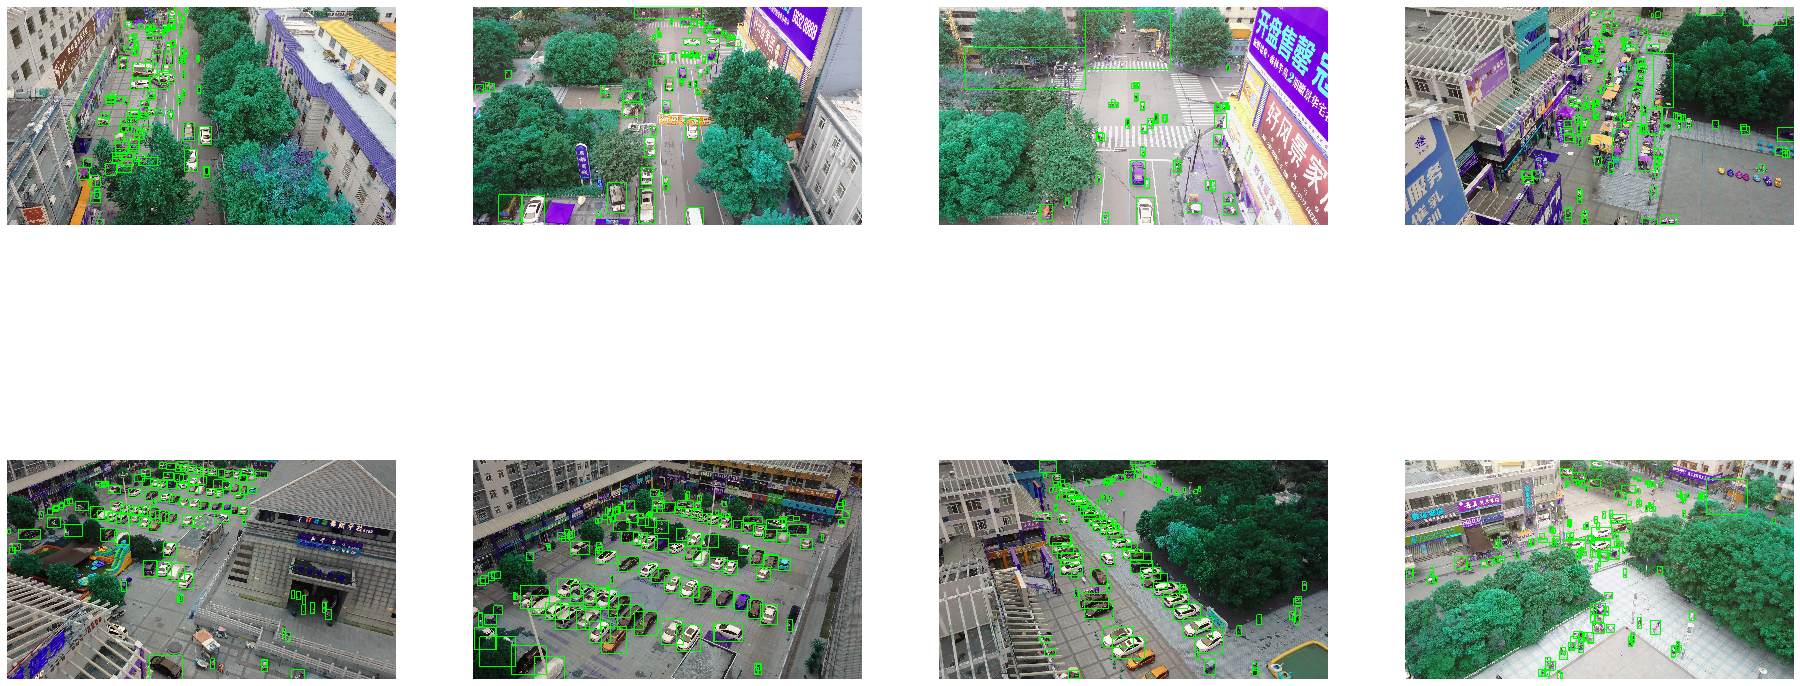

In [126]:
fig = plt.gcf()
#plt.gca().invert_yaxis()
fig.set_size_inches(ncols * 8, nrows * 8)

pic_index = 8

next_pic = [os.path.join(val_images, fname)
                for fname in val_images_list[pic_index-8:pic_index]
           ]
next_ann = [os.path.join(val_annotations, fname)
               for fname in val_annotations_list[pic_index-8:pic_index]
           ]
#print(next_pic)
#print(next_ann)
for i, (img_path, ann_path) in enumerate(zip(next_pic, next_ann)):
    
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')
    
    img = cv2.imread(img_path)
    
    ann = open(ann_path, "r")
    for box in ann.readlines():
        draw_boxes(img, box)
    #print("done")
    ann.close()
 
    plt.imshow(img)
    
plt.show()